In [1]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [7]:
data_raw= data.copy()

In [2]:
data = pd.read_csv('./final/the_end.csv')

In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data

,from,date,qty,1kg price,temp,DO_test
0,통영,2006-04-05,3441.7,3942.74,12.075,9.377054
1,통영,2006-04-06,2694.2,4181.84,12.275,9.312054
2,통영,2006-04-07,3534.3,3742.58,12.275,9.374554
3,통영,2006-04-08,4000.7,4096.25,12.300,9.214554
4,통영,2006-04-10,6286.4,3553.50,12.500,9.457054
...,...,...,...,...,...,...
10975,사천,2021-03-05,181.2,8792.24,8.850,9.665743
10976,사천,2021-03-06,178.5,9852.09,9.050,9.625743
10977,사천,2021-03-08,143.0,7927.40,9.250,8.916486
10978,사천,2021-03-09,96.0,7633.34,9.500,10.445743


In [6]:
corr = data.corr(method = 'pearson')
corr

,qty,1kg price,temp,DO_test
qty,1.000000,0.095086,-0.280162,0.033514
1kg price,0.095086,1.000000,0.086652,-0.277802
temp,-0.280162,0.086652,1.000000,-0.726651
DO_test,0.033514,-0.277802,-0.726651,1.000000


In [18]:
data['year'] = data['date'].str.split('-').str.get(0)
data['month'] = data['date'].str.split('-').str.get(1)
data['day'] = data['date'].str.split('-').str.get(2)

In [47]:
data['date2'] = data['year'].str.cat(data['month'],sep='-')

In [19]:
data

,from,date,qty,1kg price,temp,DO_test,year,month,day
0,통영,2006-04-05,3441.7,3942.74,12.075,9.377054,2006,04,05
1,통영,2006-04-06,2694.2,4181.84,12.275,9.312054,2006,04,06
2,통영,2006-04-07,3534.3,3742.58,12.275,9.374554,2006,04,07
3,통영,2006-04-08,4000.7,4096.25,12.300,9.214554,2006,04,08
4,통영,2006-04-10,6286.4,3553.50,12.500,9.457054,2006,04,10
...,...,...,...,...,...,...,...,...,...
10975,사천,2021-03-05,181.2,8792.24,8.850,9.665743,2021,03,05
10976,사천,2021-03-06,178.5,9852.09,9.050,9.625743,2021,03,06
10977,사천,2021-03-08,143.0,7927.40,9.250,8.916486,2021,03,08
10978,사천,2021-03-09,96.0,7633.34,9.500,10.445743,2021,03,09


In [23]:
group = data.groupby(['year','month'])
grouped = group.agg({'qty':'sum','1kg price':'mean'}).round(2)

In [27]:
grouped

qty  1kg price
year month                     
2006 04      79398.5    4985.68
     05      34612.7    5093.92
     06      15556.6    5429.88
     07      14119.5    5499.22
     08      11779.5    5786.89
...              ...        ...
2020 12     134632.1   10986.30
2021 01     121173.1    9157.39
     02      85059.1    8730.55
     03      33416.2    7540.82
     04       3707.0    6584.26

[181 rows x 2 columns]

In [36]:
df = grouped.reset_index().pivot( 'month','year', 'qty')
df

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,
01,NaN,316297.8,308009.9,319591.3,288439.9,344297.5,341035.3,300715.5,319349.5,269650.5,219956.6,197778.5,196652.5,188790.9,127738.4,121173.1
02,NaN,266473.0,255086.1,226840.3,270642.4,197344.1,250013.4,182736.3,172980.0,213294.1,174987.0,125269.3,156748.5,96313.9,79244.6,85059.1
03,NaN,175121.7,173494.4,150147.8,160943.2,165951.2,218023.0,129232.9,112662.4,87414.9,83039.2,80144.2,74501.7,45764.8,40017.8,33416.2
04,79398.5,80941.9,73488.4,72059.4,75300.5,70253.8,82763.5,59047.7,34624.2,33202.6,24744.1,26073.8,15184.3,19522.8,15953.7,3707.0
05,34612.7,21050.0,31259.3,25504.4,24413.4,31366.1,20826.7,19478.5,15500.8,11032.2,9228.3,8696.5,6441.9,6317.4,6801.8,NaN
06,15556.6,11234.5,17125.3,11958.5,12718.1,14156.3,9904.6,9256.4,7241.2,5807.0,4386.3,5200.4,4013.7,3057.8,2637.3,NaN
07,14119.5,11111.1,12011.8,10557.5,10502.7,9990.7,7310.0,8369.9,6509.9,4956.2,4046.0,3805.1,2940.0,2719.5,2473.0,NaN
08,11779.5,11275.8,15320.7,10377.0,10929.2,10741.1,7735.7,7484.1,7771.2,4656.5,4139.5,4255.7,2821.9,2600.3,2078.8,NaN
09,32728.3,36674.7,35957.2,32421.0,27800.1,19051.1,27519.1,23116.2,20884.1,14450.7,11641.5,11844.0,11246.3,7707.9,6449.1,NaN


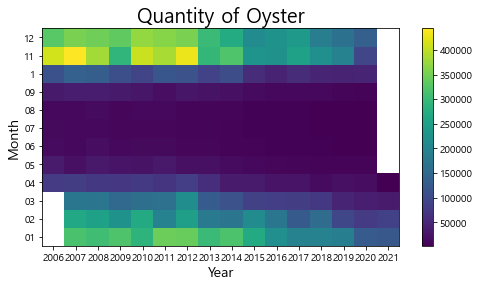

In [42]:
plt.figure(figsize =(8,4))
plt.pcolor(df)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('Quantity of Oyster', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()

plt.show()


In [43]:
df1 = grouped.reset_index().pivot( 'month','year', '1kg price')
df1

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,
01,NaN,5021.41,4846.51,7703.05,6617.08,8270.48,7620.48,5937.23,7535.14,6886.23,8805.48,9098.01,6930.63,7806.34,9230.86,9157.39
02,NaN,5309.13,5132.72,6450.66,7267.23,7294.24,6178.63,4760.68,6791.17,7107.15,7474.81,5657.21,7617.08,7294.10,8043.43,8730.55
03,NaN,4834.29,4298.40,6528.76,6273.93,6405.90,5497.40,3949.74,6459.48,6007.79,7437.33,4871.70,6316.40,7012.46,9225.69,7540.82
04,4985.68,4587.71,4530.39,6271.29,5744.57,6402.62,4874.55,4866.02,6922.93,6119.06,6720.45,4947.57,6444.46,6958.64,7243.14,6584.26
05,5093.92,4574.05,4873.83,7212.01,5978.82,7615.54,5039.07,4753.88,7484.24,7245.26,7464.72,5316.69,6768.80,7822.86,6571.65,NaN
06,5429.88,5717.28,5943.22,8426.30,6848.91,8129.08,6527.40,6005.41,7698.41,8838.92,7673.15,6449.00,7049.48,10220.07,8996.95,NaN
07,5499.22,5211.98,5189.44,6215.07,5906.06,6363.72,6345.82,4744.74,6663.56,8528.65,6446.66,4696.76,7386.82,9662.17,8885.59,NaN
08,5786.89,5610.74,6413.39,6842.61,7084.96,7918.29,6803.15,5051.48,8077.64,9993.48,7123.26,7019.09,7465.77,9853.72,7819.02,NaN
09,6088.07,5782.38,7105.26,6770.23,7308.52,9224.95,7143.98,5758.34,7702.73,8992.96,8118.76,6495.95,7345.67,8428.13,9160.69,NaN


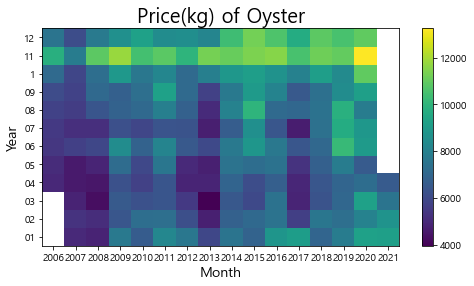

In [46]:
plt.figure(figsize =(8,4))
plt.pcolor(df1)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df1.index), 1), df.index)
plt.title('Price(kg) of Oyster', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.colorbar()

plt.show()


In [49]:
data.to_csv('./final/굴_최종(0421)')

In [51]:
group = data.groupby(['date2'])
grouped = group.agg({'qty':'sum','1kg price':'mean'}).round(2)

In [53]:
import seaborn as sns

In [55]:
grouped

,qty,1kg price
date2,,
2006-04,79398.5,4985.68
2006-05,34612.7,5093.92
2006-06,15556.6,5429.88
2006-07,14119.5,5499.22
2006-08,11779.5,5786.89
...,...,...
2020-12,134632.1,10986.30
2021-01,121173.1,9157.39
2021-02,85059.1,8730.55


<AxesSubplot:xlabel='qty', ylabel='1kg price'>

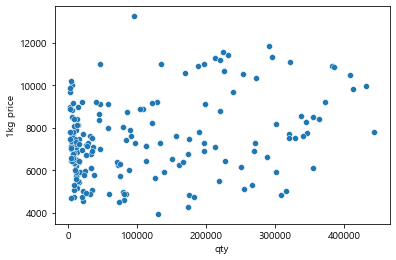

In [54]:
sns.scatterplot(x='qty',y='1kg price',data=grouped)

In [57]:
group = data.groupby(['date'])
grouped = group.agg({'qty':'sum','1kg price':'mean'}).round(2)
grouped

,qty,1kg price
date,,
2006-04-04,978.3,4948.71
2006-04-05,4600.7,4657.56
2006-04-06,3842.2,4684.90
2006-04-07,4777.3,4175.11
2006-04-08,4773.5,4668.08
...,...,...
2021-04-03,561.4,4642.59
2021-04-05,421.1,6149.90
2021-04-06,290.7,7161.38


In [58]:
y= grouped['1kg price'].values

In [59]:
ratio = 0.75
cut = np.int(len(y)*ratio)
cut

3451

In [60]:
train = y[:cut]
test = y[cut:]
len(y), len(train)

(4602, 3451)

In [61]:
def split_seq(data,n_steps) :
    x,y = [], []
    for i in range(len(data)) : 
        if i > len(data)-(n_steps+1) : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [62]:
from sklearn.linear_model import LinearRegression

# 모델만들기
lr = LinearRegression()
# 과거 10일 기온데이터를 사용해서 내일 기온을 예측하는 경우
# 과거 2-3일치를 확인해도 거의 비슷함
# 바로 내일의 예측은 간단한 문제로 보지만 7일 후, 1달 후는 예측하는 것이 어려운 문제

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

In [63]:
len(train_x)

3441

In [64]:
lr.fit(train_x,train_y)

LinearRegression()

In [65]:
lr.score(test_x,test_y).round(4)

0.743

In [66]:
y_pred = lr.predict(test_x)

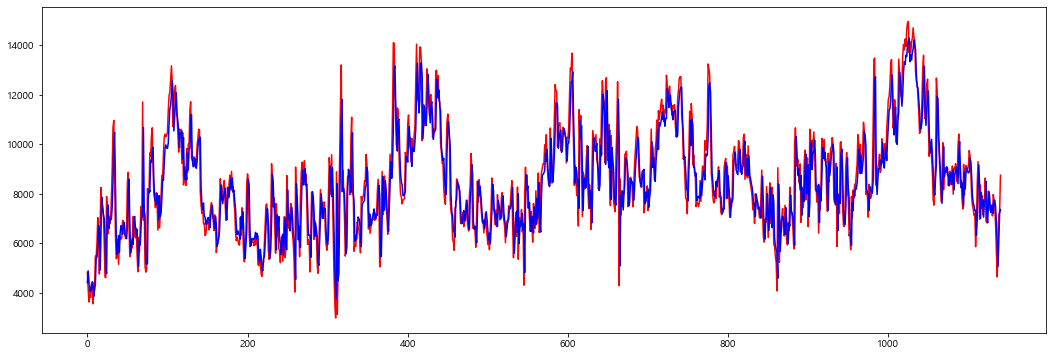

In [74]:
plt.figure(figsize=[18,6])
plt.plot(test_y,c='r')
plt.plot(y_pred,c='b')
plt.show()

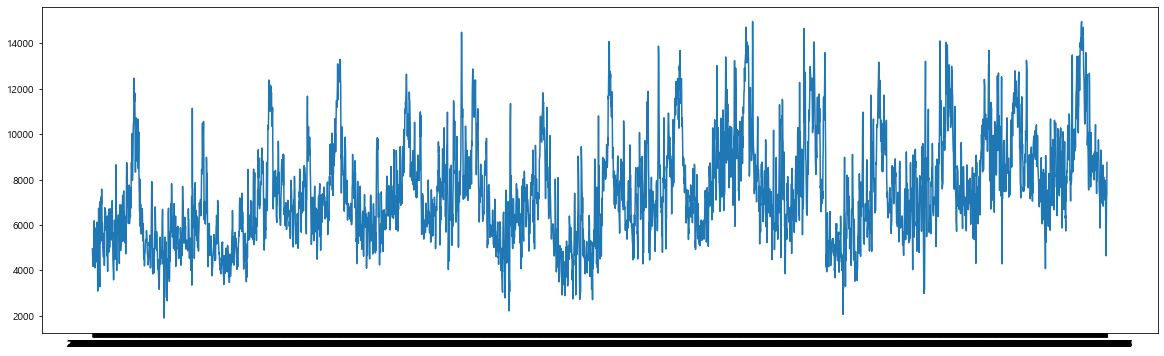

In [73]:
plt.figure(figsize=(20,6))
plt.plot(grouped.index,grouped['1kg price'])

In [76]:
y

array([4948.71, 4657.56, 4684.9 , ..., 7161.38, 7290.73, 8752.01])

In [100]:
=grouped.iloc[:,0]

date
2006-04-04     978.3
2006-04-05    4600.7
2006-04-06    3842.2
2006-04-07    4777.3
2006-04-08    4773.5
               ...  
2021-04-03     561.4
2021-04-05     421.1
2021-04-06     290.7
2021-04-07     399.9
2021-04-08     418.7
Name: qty, Length: 4602, dtype: float64

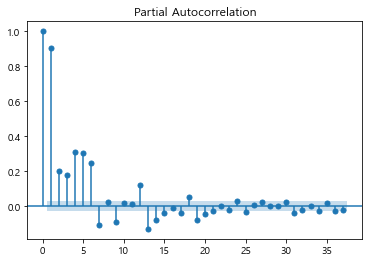

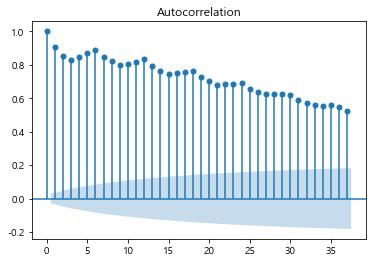

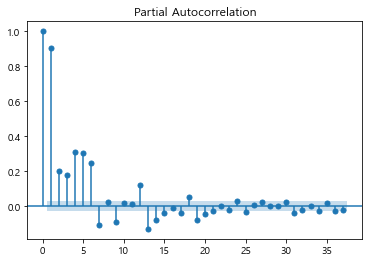

In [107]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(grouped.iloc[:,0])
plot_pacf(grouped.iloc[:,0])